In [1]:
import os
from sqlalchemy import create_engine
import dotenv
import pandas as pd
import sqlalchemy
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import tz

sns.set(style="darkgrid", palette="muted", color_codes=True)

In [2]:
# Load Database
dotenv.load_dotenv()
engine = create_engine(os.environ.get("POSTGRES_URI"), pool_pre_ping=True)

In [3]:
df = pd.read_sql(sqlalchemy.text("""
SELECT 
shop_name,
  gold,
  rank,
  num_potions,
  ml_in_barrels,
  (
    TO_CHAR(created_at AT TIME ZONE 'America/Los_Angeles',
          'Mon dd - ')||
      (
      CAST(EXTRACT(hour from (created_at AT TIME ZONE 'America/Los_Angeles')) AS INTEGER) / 2
      )
      ||' - '||
    TO_CHAR(DATE (created_at AT TIME ZONE 'America/Los_Angeles'), 'Dy')
  ) AS date
FROM top_shops
ORDER BY date ASC
                                 """), engine)
df.head()

,shop_name,gold,rank,num_potions,ml_in_barrels,date
0,Bobs Brews,715,1,13,100,Oct 20 - 10 - Fri
1,Apothecary of Wonders,465,2,2,0,Oct 20 - 10 - Fri
2,something cute and unique,430,3,20,0,Oct 20 - 10 - Fri
3,RoPotions,320,4,5,100,Oct 20 - 10 - Fri
4,Red Rook Remedies,310,5,5,100,Oct 20 - 10 - Fri


C:\Users\dylan\AppData\Local\Temp\ipykernel_30200\2201704146.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.lineplot(data=df,hue='shop_name', x='date', y='gold', ax=ax, ci=None)


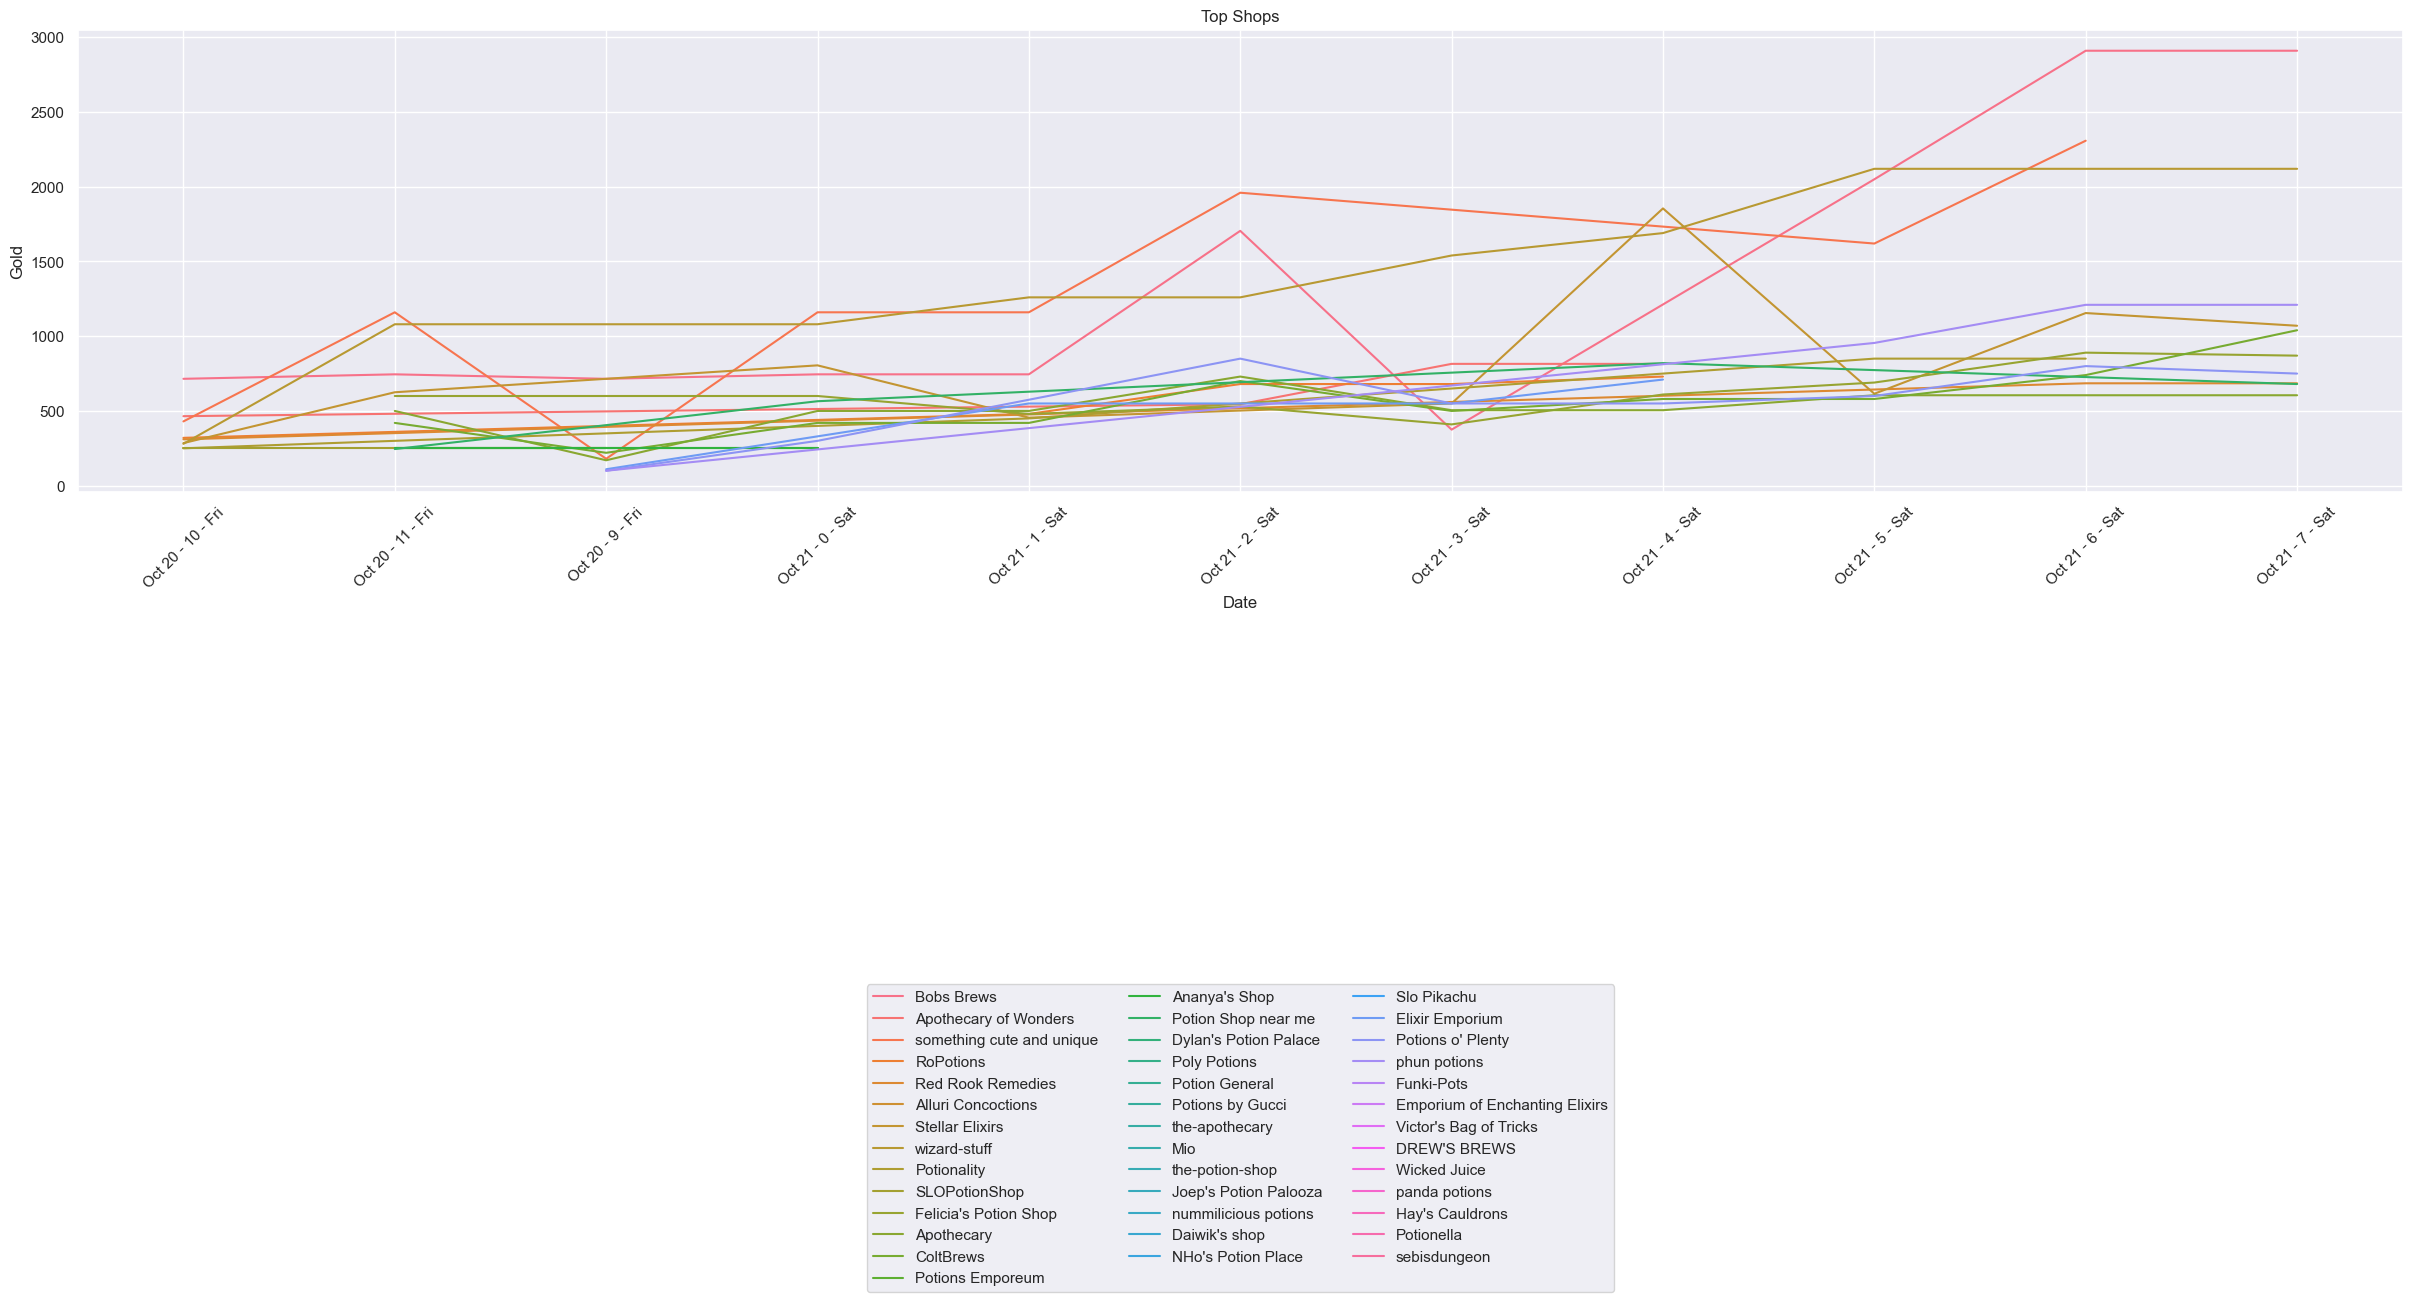

In [4]:
fig, ax = plt.subplots(figsize = (30,6))
fig = sns.lineplot(data=df,hue='shop_name', x='date', y='gold', ax=ax, ci=None)
ax.set(xlabel='Date', ylabel='Gold', title='Top Shops')
# for label in ax.xaxis.get_ticklabels()[::2]:
#     label.set_visible(False)
_ = plt.xticks(rotation=45)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -1.05),
          ncol=3, fancybox=True)

NameError: name 'df_current_values' is not defined

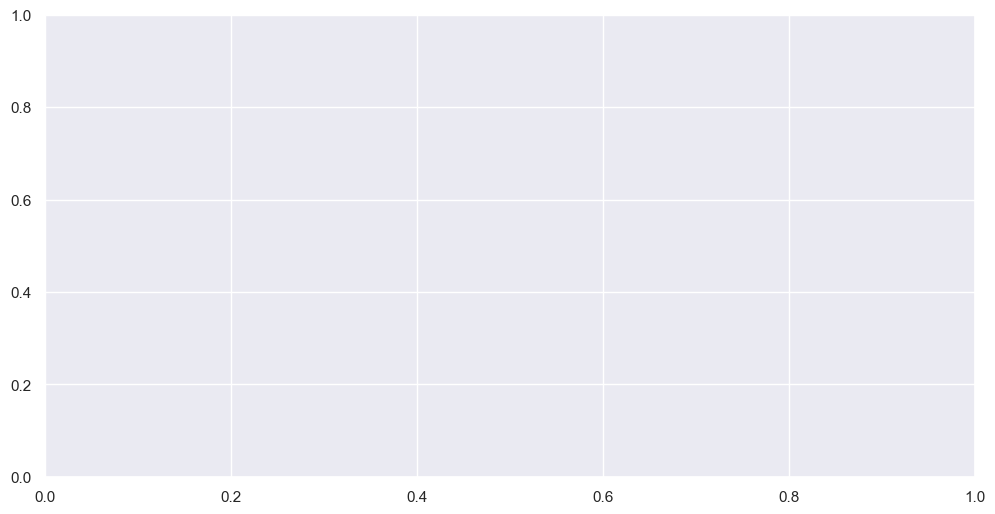

In [5]:
fig, ax = plt.subplots(figsize = (12,6))

red_green_blue_dark_values = df_current_values[
    (df_current_values['StockType'] == "red_ml_curr")
    | (df_current_values['StockType'] == "green_ml_curr")
    | (df_current_values['StockType'] == "blue_ml_curr")
    | (df_current_values['StockType'] == "dark_ml_curr")
    ][['nice_timestamp', 'StockType', 'Value']]



fig = sns.lineplot(data=red_green_blue_dark_values, x='nice_timestamp', y='Value', hue='StockType', palette=['tab:red','tab:green', 'tab:blue','k'], ax=ax)
ax.set(xlabel='Date', ylabel='ML', title='Barrel Reserve Inventory')
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
_ = plt.xticks(rotation=45)